# Lektion 8

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matrixplots

In [2]:
i = Symbol('i')
j = Symbol('j')

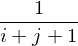

In [3]:
def hilbert_element(i,j):
    return 1/(i+j+1)

hilbert_element(i,j)

In [4]:
hilbert = Matrix(20, 20, hilbert_element)

In [5]:
# plt.imshow(hilbert)  # TypeError

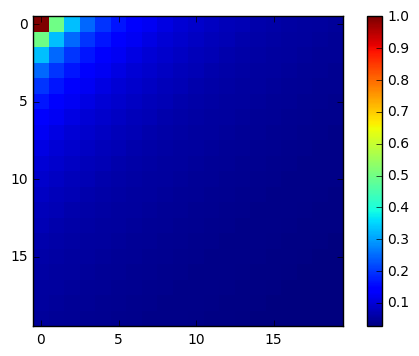

In [6]:
plt.imshow(np.array(hilbert).astype(float), interpolation='none')
plt.colorbar();

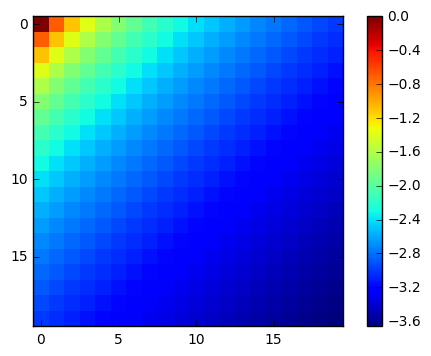

In [7]:
plt.imshow(np.log(np.array(hilbert).astype(float)), 
           interpolation='none')
plt.colorbar();

In [8]:
hilbert = Matrix(60, 60, hilbert_element)

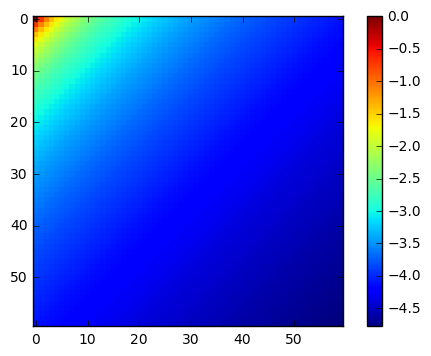

In [9]:
plt.imshow(np.log(np.array(hilbert).astype(float)), 
           interpolation='none')
plt.colorbar();

In [10]:
inv_hilbert = hilbert**(-1)

/home/braun/miniconda3/envs/compana16/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


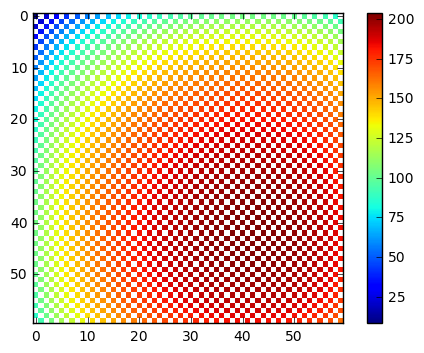

In [11]:
plt.imshow(np.log(np.array(inv_hilbert).astype(float)), 
           interpolation='none')
plt.colorbar();

Was ist das Problem?

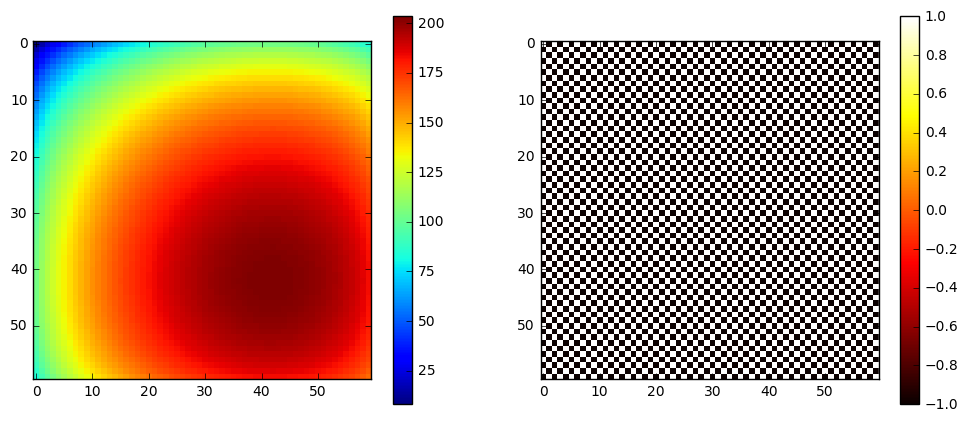

In [14]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.imshow(np.log(abs(np.array(inv_hilbert).astype(float))), 
           interpolation='none')
plt.colorbar()
fig.add_subplot(122)
plt.imshow(np.sign(np.array(inv_hilbert).astype(float)), 
           interpolation='none', cmap=plt.cm.hot)
plt.colorbar();

Als Ersatz für 3D-Plot:

In [15]:
x = Symbol('x')
y = Symbol('y')
f = cos(sqrt(x**2+y**2))
fn = lambdify((x,y), f, 'numpy')

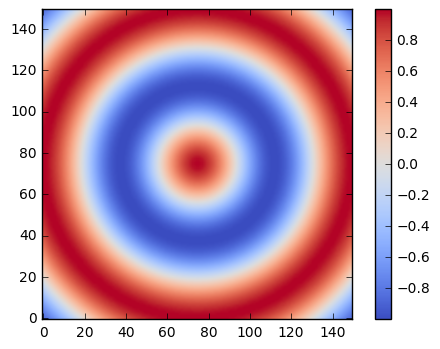

In [16]:
x = np.linspace(-2*np.pi, 2*np.pi, 150)
y = x
X, Y = np.meshgrid(x, y)
W = fn(X, Y)
plt.imshow(W, origin='lower', cmap=plt.cm.coolwarm)
plt.colorbar();

In [17]:
extent = (x[0], x[-1], y[0], y[-1])
extent

In [18]:
W[W<0] = -W[W<0]  # abs(W) wäre einfacher

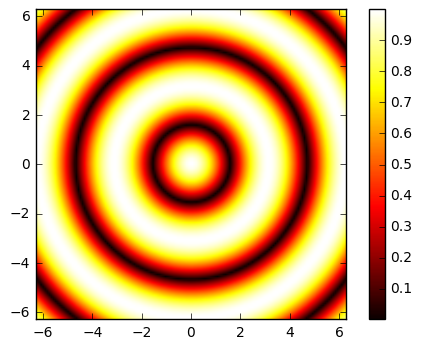

In [19]:
plt.imshow(W, origin='lower', cmap=plt.cm.hot, extent=extent)
plt.colorbar();

## Lineare Gleichungssysteme

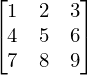

In [20]:
A = Matrix(3, 3, range(1,10))
A

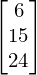

In [21]:
b = Matrix([6, 15, 24])
b

Wir wollen $Ax=b$ lösen.

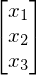

In [22]:
x = Matrix([Symbol('x_'+str(j)) for j in [1,2,3]])
x

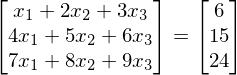

In [23]:
glg = Eq(A*x, b)
glg

In [24]:
Lsg = solve(glg)
Lsg

Probe:

In [25]:
glg.subs(Lsg[0])

konkrete Lösung

In [26]:
x.subs(Lsg[0]).subs(x[2], 0)

andere konkrete Lösung

In [27]:
x.subs(Lsg[0]).subs(x[2], 1)

In [28]:
solve(A*x, x)  # Kern von A

In [29]:
solve(A*x, Matrix([0,0,1]))  # unlösbar

## Veränderliche und unveränderliche Matrizen

In [30]:
B = A

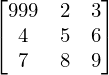

In [31]:
B[0,0] = 999
B

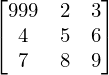

In [32]:
A

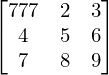

In [33]:
B = A.copy()
B[0,0] = 777
B

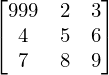

In [34]:
A

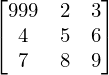

In [35]:
C = A[0:3, 0:3]
C

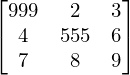

In [36]:
C[1,1] = 555
C

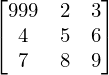

In [37]:
A

In [38]:
type(A)

sympy.matrices.dense.MutableDenseMatrix

In [39]:
Ai = simplify(A)
type(Ai)

sympy.matrices.immutable.ImmutableMatrix

In [43]:
# Ai[0,0] = 3 # TypeError, denn Ai ist ImmutableMatrix

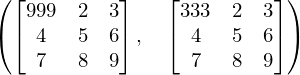

In [44]:
B = Matrix(Ai)
B[0,0] = 333
A, B

In [45]:
type(Matrix(B))

sympy.matrices.dense.MutableDenseMatrix

## Parameterabhängige Matrizen

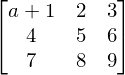

In [46]:
a = Symbol('a')
A = Matrix(3,3,range(1,10))
A[0,0] = 1 + a
A

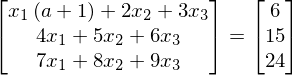

In [47]:
glg = Eq(A*x, b)
glg

In [48]:
solve(glg, x)

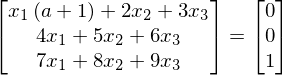

In [49]:
glg = Eq(A*x, Matrix([0,0,1]))
glg

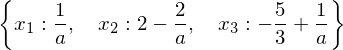

In [50]:
solve(glg, x)

In [51]:
A.det()

## Gauß-Elimination zu Fuß

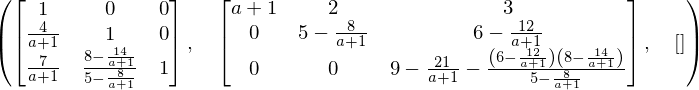

In [52]:
L, U, R = A.LUdecomposition()
L, U, R

In [53]:
L*U == A  # aber nur, weil R=[]

True

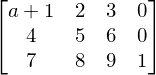

In [54]:
A = Matrix(3,3,range(1,10))
A[0,0] = 1+a
b = Matrix([0,0,1])
A1 = A.row_join(b)
A1

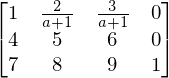

In [55]:
def func1(b, j):
    return b/A1[0,0]
A1.row_op(0, func1)
A1

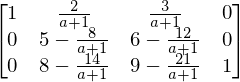

In [56]:
def func2(b, j):
    return b - A[1,0]*A1[0,j]
A1.row_op(1, func2)
def func3(b, j):
    return b - A[2,0]*A1[0,j]
A1.row_op(2, func3)
A1

Das ist aber sehr fehleranfällig

In [57]:
def mult_zeile(A, zeilennr, faktor):
    B = Matrix(A)
    def func(b, j):
        return b*faktor
    B.row_op(zeilennr, func)
    return B

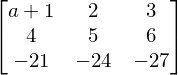

In [58]:
B = A.copy()
mult_zeile(B, 2, -3)

In [59]:
def add_zeile(A, quell_nr, ziel_nr, faktor):
    B = Matrix(A)  
    def func(b, j):
        return b + B[quell_nr,j]*faktor
    B.row_op(ziel_nr, func)
    return B

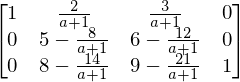

In [60]:
A1

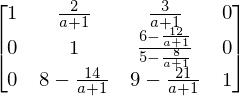

In [61]:
A2 = mult_zeile(A1, 1, 1/A1[1,1])
A2

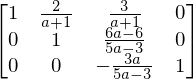

In [62]:
A3 = add_zeile(A2, 1, 2, -A2[2,1])
A3 = simplify(A3)
A3

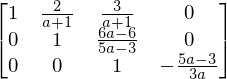

In [63]:
A4 = mult_zeile(A3, 2, 1/A3[2,2])
A4

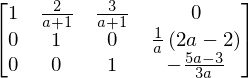

In [64]:
A5 = add_zeile(A4, 2, 1, -A4[1,2])
A5

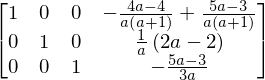

In [65]:
A6 = add_zeile(A5, 1, 0, -A5[0,1])
A7 = add_zeile(A6, 2, 0, -A6[0,2])
A7

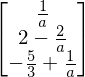

In [66]:
y = simplify(A7[0:3, 3])
y

In [67]:
simplify(A*y) == b

True

## Eigenwerte

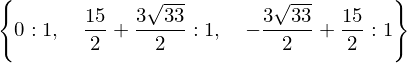

In [68]:
A = Matrix(3, 3, range(1,10))
A.eigenvals()

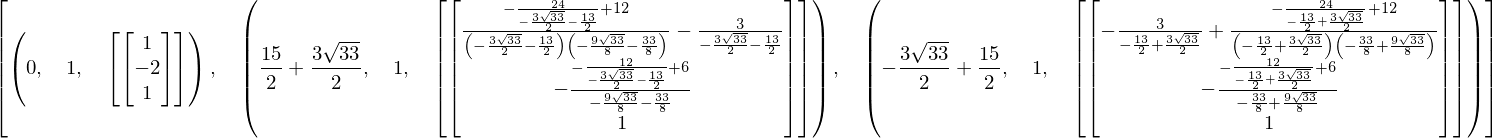

In [69]:
A.eigenvects()

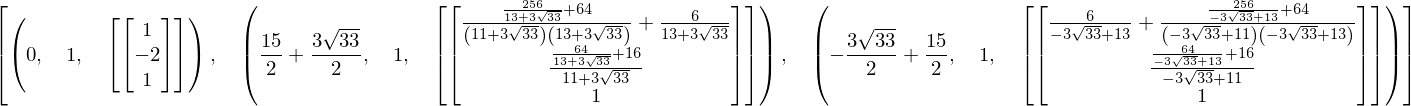

In [70]:
A.eigenvects(simplify=True)

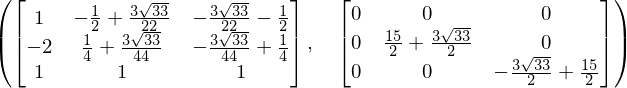

In [71]:
T, J = A.diagonalize()
T = simplify(T)
T, J

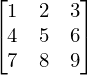

In [72]:
simplify(T * J * T**(-1))